## Neural Network

Missing values in each column:
 Unnamed: 0              0
GridId                  0
Toid                    0
GRID_ExactCut_ID        0
Location_ExactCut       0
BoroughName_ExactCut    0
Lts                     0
Length (m)              0
Emissions               0
Year                    0
Pollutant               0
Emissions Unit          0
VehicleType             0
Emission Value          0
RowID                   0
TLRN                    0
MotorwayNumber          0
Speed (kph)             0
AADT                    0
VKM                     0
dtype: int64


/opt/anaconda3/lib/python3.11/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


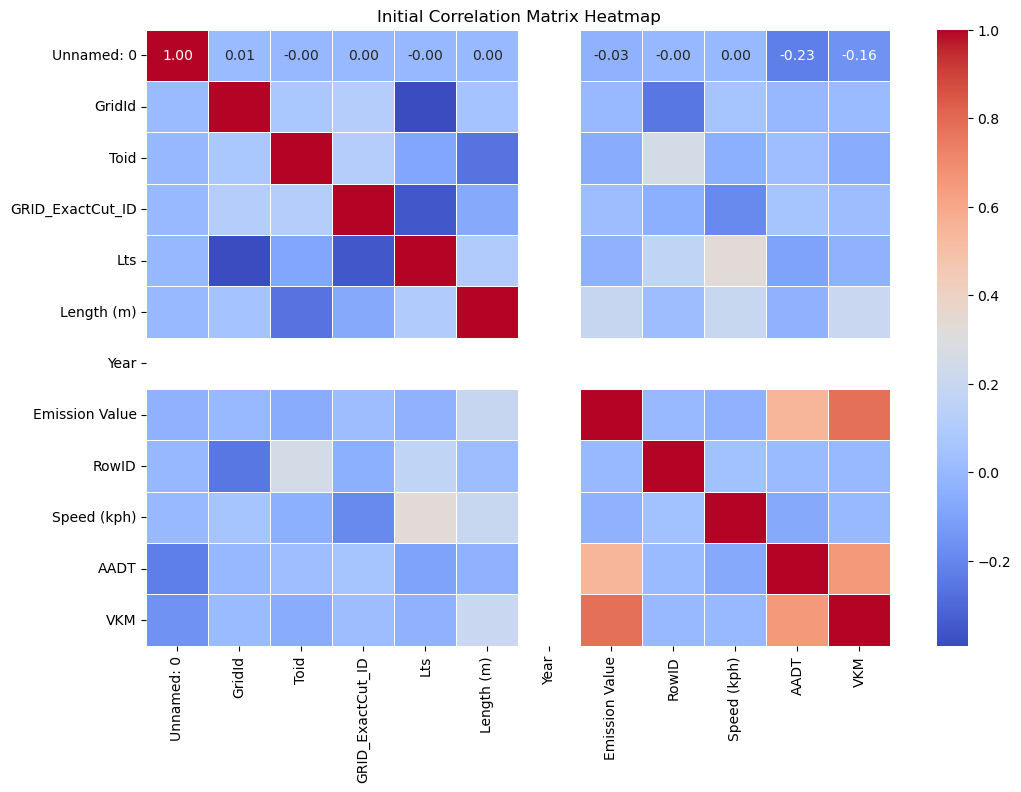

Emission Value          1.000000
VKM                     0.778763
AADT                    0.546873
Length (m)              0.193900
VehicleType             0.075468
Toid                    0.055868
Unnamed: 0              0.033606
Speed (kph)             0.032406
Lts                     0.031983
GRID_ExactCut_ID        0.018073
BoroughName_ExactCut    0.017632
Location_ExactCut       0.004152
TLRN                    0.003344
RowID                   0.002650
GridId                  0.002186
Emissions                    NaN
Year                         NaN
Pollutant                    NaN
Emissions Unit               NaN
MotorwayNumber               NaN
Name: Emission Value, dtype: float64
['Emission Value', 'VKM', 'AADT', 'Length (m)', 'VehicleType', 'Toid']


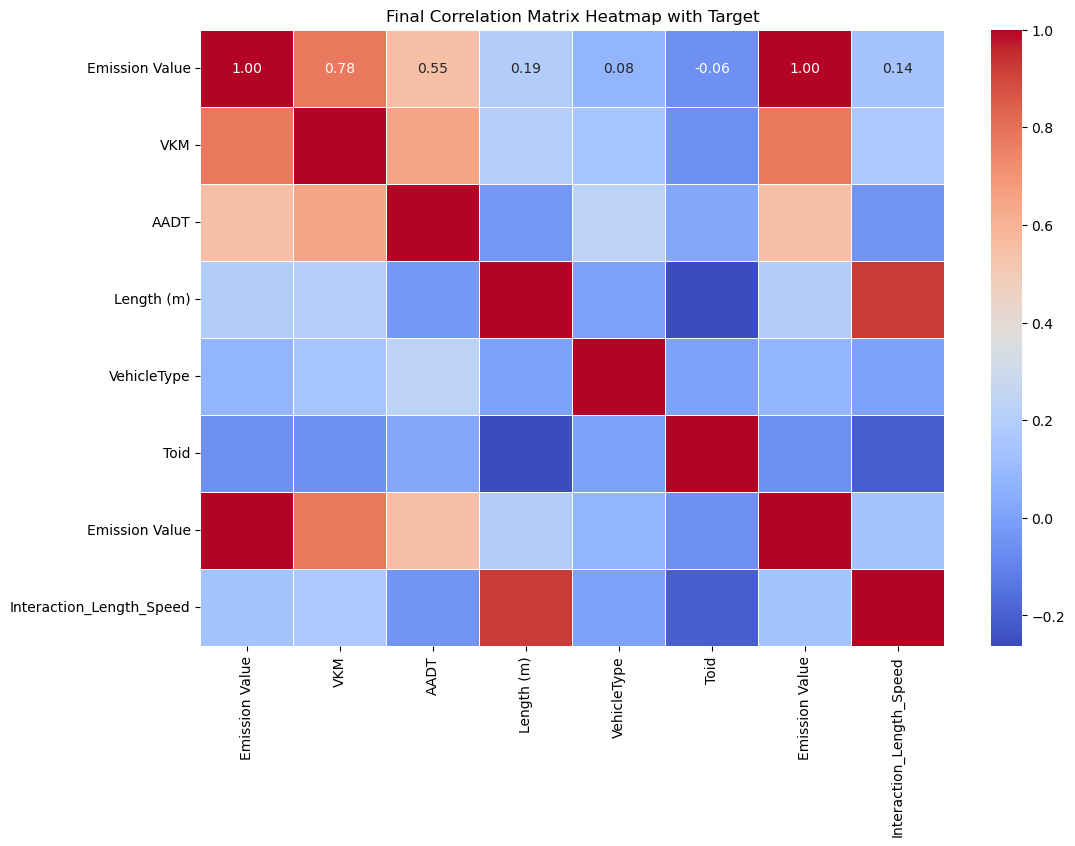

        VKM      AADT  Length (m)  VehicleType      Toid  \
0 -0.023502  0.095732   -0.327321     0.434524 -6.243198   
1 -0.246166 -0.353113   -0.578696     0.434524 -6.144199   
2  1.043801  0.095732    2.431609     0.434524 -6.298176   
3 -0.246166 -0.353113   -0.583481     0.434524 -6.298100   
4  0.915810  0.242550    1.360420     0.434524 -6.298087   

   Interaction_Length_Speed  
0                 -0.117514  
1                 -0.444328  
2                  2.061928  
3                 -0.455785  
4                  0.587842  


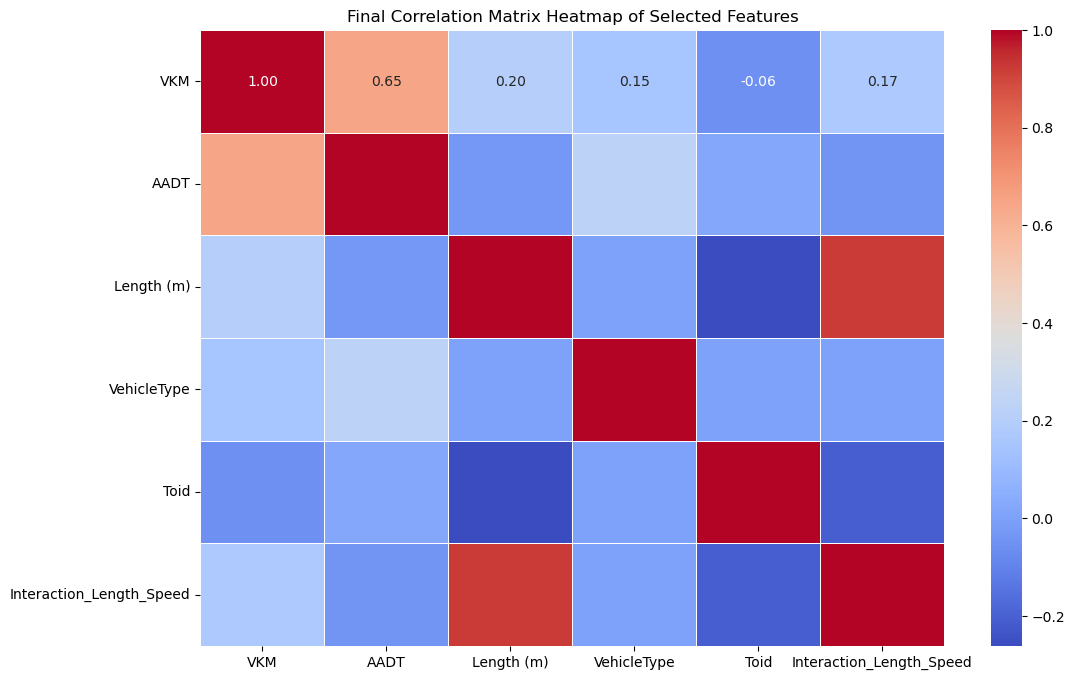

{'X_train_shape': (269529, 6), 'X_test_shape': (67383, 6), 'y_train_shape': (269529,), 'y_test_shape': (67383,), 'features': ['Emission Value', 'VKM', 'AADT', 'Length (m)', 'VehicleType', 'Toid', 'Emission Value'], 'target': 'Emission Value'}


In [3]:
%run data_prep_and_analysis.ipynb

Epoch 1/100


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6739/6739 ━━━━━━━━━━━━━━━━━━━━ 3s 326us/step - loss: 6.3446 - val_loss: 3.4845
Epoch 2/100
6739/6739 ━━━━━━━━━━━━━━━━━━━━ 2s 300us/step - loss: 4.2224 - val_loss: 2.7380
Epoch 3/100
6739/6739 ━━━━━━━━━━━━━━━━━━━━ 2s 341us/step - loss: 3.1265 - val_loss: 2.4237
Epoch 4/100
6739/6739 ━━━━━━━━━━━━━━━━━━━━ 2s 297us/step - loss: 3.3485 - val_loss: 1.7804
Epoch 5/100
6739/6739 ━━━━━━━━━━━━━━━━━━━━ 2s 302us/step - loss: 2.5465 - val_loss: 1.7915
Epoch 6/100
6739/6739 ━━━━━━━━━━━━━━━━━━━━ 2s 300us/step - loss: 3.9205 - val_loss: 1.6293
Epoch 7/100
6739/6739 ━━━━━━━━━━━━━━━━━━━━ 2s 300us/step - loss: 2.8045 - val_loss: 1.2652
Epoch 8/100
6739/6739 ━━━━━━━━━━━━━━━━━━━━ 2s 306us/step - loss: 2.4271 - val_loss: 1.3475
Epoch 9/100
6739/6739 ━━━━━━━━━━━━━━━━━━━━ 2s 306us/step - loss: 1.9816 - val_loss: 2.9592
Epoch 10/100
6739/6739 ━━━━━━━━━━━━━━━━━━━━ 2s 316us/step - loss: 2.5870 - val_loss: 1.4249
Epoch 11/100
6739/6739 ━━━━━━━━━━━━━━━━━━━━ 2s 300us/step - loss: 1.6268 - val_loss: 1.0971
Epoch 12/

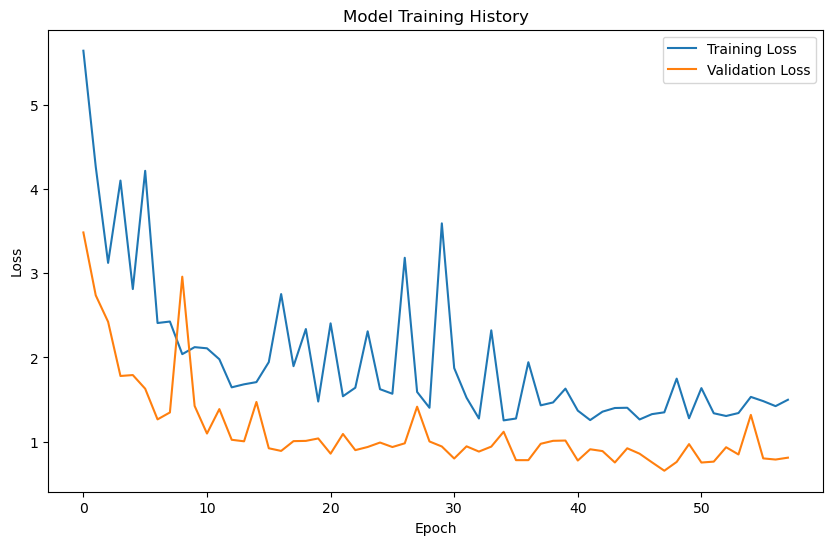

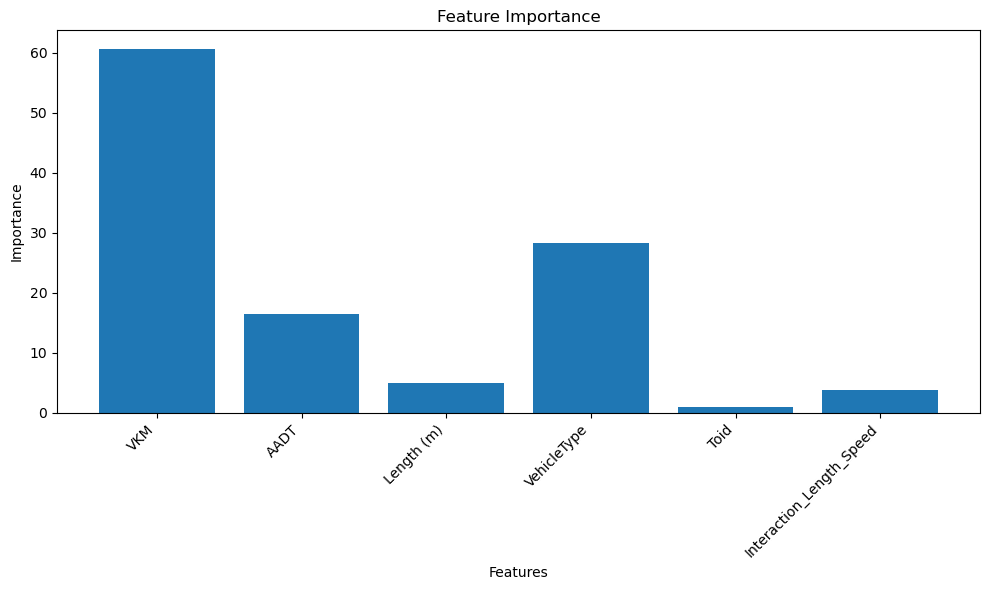

In [5]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Define the model
def create_model(input_dim):
    model = Sequential([
        Dense(64, activation='relu', input_dim=input_dim),
        Dropout(0.2),
        Dense(32, activation='relu'),
        Dropout(0.2),
        Dense(16, activation='relu'),
        Dense(1)  # Output layer
    ])
    return model

# Create and compile the model
model = create_model(X_train.shape[1])
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    callbacks=[early_stopping],
    verbose=1
)

# Evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared Score: {r2}")
print(f"Mean Absolute Error: {mae}")

# Plot training history
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Training History')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# Feature importance (using the weights of the first layer as a proxy)
feature_importance = np.abs(model.layers[0].get_weights()[0].sum(axis=1))
feature_names = X_train.columns

plt.figure(figsize=(10, 6))
plt.bar(feature_names, feature_importance)
plt.title('Feature Importance')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Save the model
model.save('co2_prediction_model.h5')